## PREDICTION USING SUPERVISED MACHINE LEARNING
TASK : To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 

In [1]:
#importing the required libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Reading the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [17]:
#knowing our data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Ploting The Data
This step is performed to look for any relationship between the variables

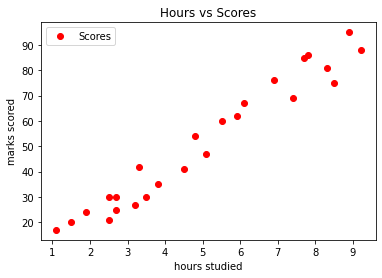

In [3]:
#plotting the variables
data.plot(x = 'Hours', y = 'Scores',style = 'o',  color = 'r')
plt.title('Hours vs Scores')
plt.xlabel('hours studied')
plt.ylabel('marks scored')
plt.show()

from the above graph it is clearly visible that the variables share a positive linear relation between them. 

## Preparing our data for training

In [3]:
X = data.iloc[:,:-1].values #attributes
y = data.iloc[:,1].values #labels

Splitting into testing and training sets

In [4]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Building our Model

In [5]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  
regr.fit(X_train, y_train) 
print("Training Completed successfully")

Training Completed successfully


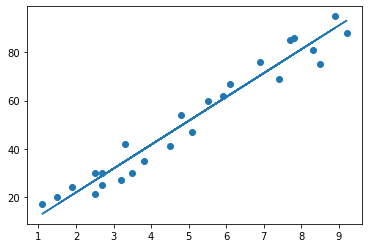

In [6]:
# Plotting the regression line
line = regr.coef_*X+regr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions On The Test Set

In [7]:
y_predict = regr.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
#Comparing the Actual values and the predicted values against each other
df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_predict})  
df 

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Making Predictions on our own data
We can make predictions on our own data since our model has been already trained

In [25]:
hours = [[9.25]] #value has to be in a 2D array
new_pred = regr.predict(hours)
print("No of Hours =",hours[0][0])
print("Predicted Score =",new_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluating The Model
There are various evaluation metrics here we will use the Mean Absolute Error(MAE) to evaluate our model

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002982
